##### Importing Libraries

In [134]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Reading Dataset

In [135]:
data = pd.read_spss('dataset.sav')
data.head()

,loc,vg,ev,iv,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,false
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,true
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1.0,0.0,6.0,0.0,15.0,15.0,44.0,19.0,9.0,false
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0.0,0.0,3.0,0.0,16.0,8.0,31.0,16.0,7.0,false
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0.0,0.0,3.0,0.0,16.0,12.0,46.0,26.0,11.0,false


In [136]:
data['defects'] = data['defects'].map({'false':0,'true':1})
data.head()

,loc,vg,ev,iv,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1.0,0.0,6.0,0.0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0.0,0.0,3.0,0.0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0.0,0.0,3.0,0.0,16.0,12.0,46.0,26.0,11.0,0


In [137]:
data[data['defects'] == 1]['defects'].count()

49

In [138]:
len(data)

498

# Creating the heatmap

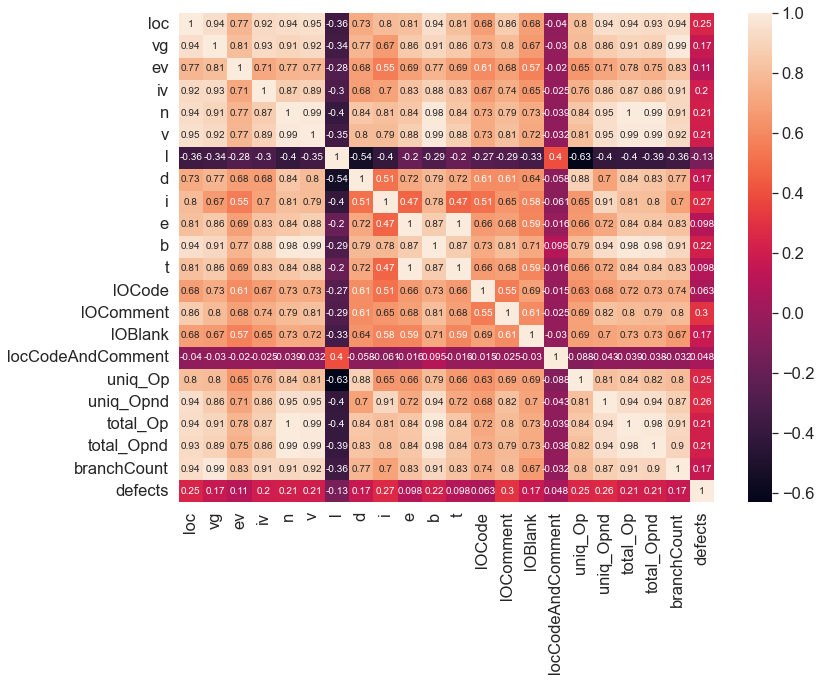

In [140]:
fig = plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), annot=True)
plt.savefig("Heatmap.png")

# Removing Correlated Features

In [7]:
correlated_features = set()
correlation_matrix = data.corr()

In [8]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [9]:
print(correlated_features)

{'vg', 'v', 'total_Opnd', 't', 'n', 'uniq_Opnd', 'total_Op', 'branchCount', 'b', 'iv'}


In [10]:
# Dropping Correlated Features
data.drop(labels=correlated_features, axis=1, inplace=True)
data.head()

,loc,ev,l,d,i,e,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,defects
0,1.1,1.4,1.30,1.30,1.30,1.30,2.0,2.0,2.0,2.0,1.2,0
1,1.0,1.0,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1
2,24.0,1.0,0.11,9.50,32.54,2936.77,1.0,0.0,6.0,0.0,15.0,0
3,20.0,4.0,0.06,16.00,13.47,3447.89,0.0,0.0,3.0,0.0,16.0,0
4,24.0,6.0,0.06,17.33,19.97,5999.58,0.0,0.0,3.0,0.0,16.0,0


In [11]:
data.columns

Index(['loc', 'ev', 'l', 'd', 'i', 'e', 'lOCode', 'lOComment', 'lOBlank',
       'locCodeAndComment', 'uniq_Op', 'defects'],
      dtype='object')

# Splitting Data into training set and test set

In [12]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Train Logistic Regression, Naive Bayes, K Nearest Neighbour, Decision Tree, Random Forest, Gradient Boosting without balancing dataset

In [14]:
values = []

In [15]:
def check_performance(classifier, param_grid, X_train, X_test, y_train, y_test, results, idx):

    grid = GridSearchCV(classifier , param_grid, cv = 5, n_jobs = -1)
    result = grid.fit(X_train,y_train)
    best_model = result.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:,1]
    train_score = round(accuracy_score(y_train, best_model.predict(X_train)),3)
    test_score = round(accuracy_score(y_test, y_pred), 3)              
    # Metrics
    results.iloc[0, idx] = round(accuracy_score(y_test, y_pred), 3)
    results.iloc[1, idx] = round(roc_auc_score(y_test, y_pred), 3)
    results.iloc[2, idx] = round(precision_score(y_test, y_pred), 2)
    results.iloc[3, idx] = round(recall_score(y_test, y_pred), 2)
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    print(classification_report(y_test, y_pred))
    sns.heatmap(cf_matrix, annot=True ,fmt='d', cmap='Blues', linewidths=1)
    print('Train Accuracy: ' + str(train_score))
    print('Test Accuracy: '  + str(test_score))

    # Roc curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    values.append([false_positive_rate, true_positive_rate])

In [16]:
results = pd.DataFrame(columns = ['LG', 'NB', 'KNN', 'DT', 'RF', 'GB','RU_LG', 'RO_LG', 'ENN_LG', 'SMO_LG','RU_NB', 'RO_NB', 'ENN_NB', 'SMO_NB',
                                  'RU_KNN', 'RO_KNN', 'ENN_KNN', 'SMO_KNN','RU_DT', 'RO_DT', 'ENN_DT', 'SMO_DT', 'RU_RF', 'RO_RF', 'ENN_RF', 'SMO_RF',
                                  'RU_GB', 'RO_GB', 'ENN_GB', 'SMO_GB','LG_PCA', 'NB_PCA', 'KNN_PCA', 'DT_PCA', 'RF_PCA', 'GB_PCA','RU_LG_PCA', 'RO_LG_PCA',
                                  'ENN_LG_PCA', 'SMO_LG_PCA','RU_NB_PCA', 'RO_NB_PCA', 'ENN_NB_PCA', 'SMO_NB_PCA','RU_KNN_PCA', 'RO_KNN_PCA', 'ENN_KNN_PCA', 
                                  'SMO_KNN_PCA','RU_DT_PCA','RO_DT_PCA', 'ENN_DT_PCA', 'SMO_DT_PCA', 'RU_RF_PCA', 'RO_RF_PCA', 'ENN_RF_PCA', 'SMO_RF_PCA',
                                  'RU_GB_PCA', 'RO_GB_PCA', 'ENN_GB_PCA', 'SMO_GB_PCA'], index = ['Accuracy', 'ROC_AUC', 'Precision', 'Recall'])

# LG --> Logistic Regression
# NB --> Naive Bayes
# KNN --> K-Nearest Neighbour
# DT --> Decision Tree
# RF --> Random Forest
# GB --> Gradient  Boosting 
# RU --> Random Undersampling
# RO --> Random Oversampling
# ENN --> Edited Nearest Neighbours
# SMO --> SMOTE

In [24]:
# define search space
param_grid_lg = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
param_grid_knn = { 'n_neighbors' : [5,7,9,11,13,15]}
param_grid_dt = {'max_depth': range(1, 20), 'min_samples_leaf': range(2, 20), 'criterion': ["gini", "entropy"]}
param_grid_rf = {'n_estimators': [200, 400, 600],
                 'max_depth': [10, 20, 30],
                 'bootstrap': [True, False]}
param_grid_gb = {'n_estimators' : [10, 50, 100, 500], 'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]}

#### Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        88
           1       0.50      0.08      0.14        12

    accuracy                           0.88       100
   macro avg       0.69      0.54      0.54       100
weighted avg       0.84      0.88      0.84       100

Train Accuracy: 0.894
Test Accuracy: 0.88


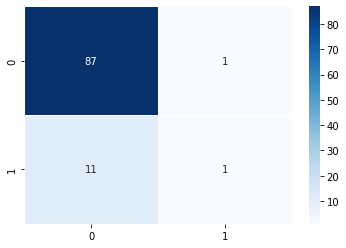

In [18]:
check_performance(LogisticRegression(max_iter=1000), param_grid_lg, X_train, X_test, y_train, y_test, results, 0)

#### Naive Bayes

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        88
           1       0.00      0.00      0.00        12

    accuracy                           0.87       100
   macro avg       0.44      0.49      0.47       100
weighted avg       0.77      0.87      0.82       100

Train Accuracy: 0.91
Test Accuracy: 0.87


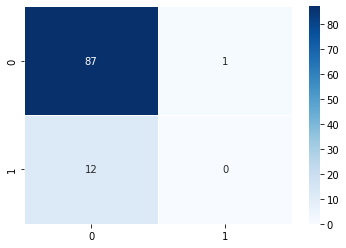

In [20]:
check_performance(GaussianNB(), param_grid_nb, X_train, X_test, y_train, y_test, results, 1)

#### KNN

C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.p

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        88
           1       0.00      0.00      0.00        12

    accuracy                           0.88       100
   macro avg       0.44      0.50      0.47       100
weighted avg       0.77      0.88      0.82       100

Train Accuracy: 0.907
Test Accuracy: 0.88


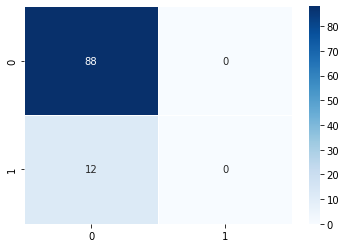

In [21]:
check_performance(KNeighborsClassifier(), param_grid_knn, X_train, X_test, y_train, y_test, results, 2)

#### Decision Tree

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        88
           1       0.50      0.08      0.14        12

    accuracy                           0.88       100
   macro avg       0.69      0.54      0.54       100
weighted avg       0.84      0.88      0.84       100

Train Accuracy: 0.912
Test Accuracy: 0.88


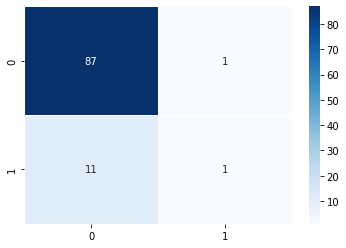

In [22]:
check_performance(DecisionTreeClassifier(random_state = 42), param_grid_dt, X_train, X_test, y_train, y_test, results, 3)

#### Random Forest 

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        88
           1       0.00      0.00      0.00        12

    accuracy                           0.86       100
   macro avg       0.44      0.49      0.46       100
weighted avg       0.77      0.86      0.81       100

Train Accuracy: 0.997
Test Accuracy: 0.86


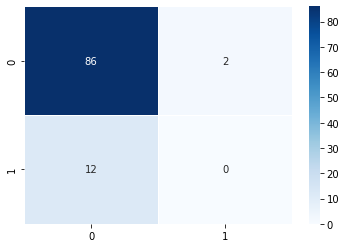

In [23]:
check_performance(RandomForestClassifier(random_state = 42), param_grid_rf, X_train, X_test, y_train, y_test, results, 4)

#### Gradient Boosting

C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.p

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        88
           1       0.00      0.00      0.00        12

    accuracy                           0.88       100
   macro avg       0.44      0.50      0.47       100
weighted avg       0.77      0.88      0.82       100

Train Accuracy: 0.907
Test Accuracy: 0.88


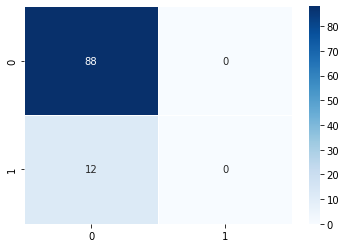

In [27]:
check_performance(GradientBoostingClassifier(random_state = 0), param_grid_gb, X_train, X_test, y_train, y_test, results, 5)

# Balancing the dataset

In [29]:
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE

rus = RandomUnderSampler(replacement=False)
ros = RandomOverSampler()
enn = EditedNearestNeighbours(n_neighbors=5)
smote = SMOTE()

X_subsample, y_subsample = rus.fit_resample(X, y)
X_oversample, y_oversample = ros.fit_resample(X, y)
X_enn, y_enn = enn.fit_resample(X, y)
X_smote, y_smote = smote.fit_resample(X, y)

In [30]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_subsample, y_subsample, test_size=0.20, random_state=42)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversample, y_oversample, test_size=0.20, random_state=42)
X_train_enn, X_test_enn, y_train_enn, y_test_enn = train_test_split(X_enn, y_enn, test_size=0.20, random_state=42)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote, test_size=0.20, random_state=42)

#### Logistic Regression Balanced

_______________________________________RandomUnderSampler_________________________________________________
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.60      0.75      0.67         8

    accuracy                           0.70        20
   macro avg       0.70      0.71      0.70        20
weighted avg       0.72      0.70      0.70        20

Train Accuracy: 0.667
Test Accuracy: 0.7


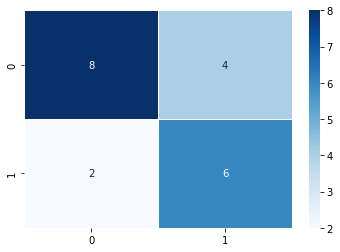

In [33]:
print(f'_______________________________________RandomUnderSampler_________________________________________________')
check_performance(LogisticRegression(max_iter=2000), param_grid_lg, X_train_us, X_test_us, y_train_us, y_test_us, results, 6)

_______________________________________RandomOverSampler__________________________________________________
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        96
           1       0.64      0.64      0.64        84

    accuracy                           0.66       180
   macro avg       0.66      0.66      0.66       180
weighted avg       0.66      0.66      0.66       180

Train Accuracy: 0.741
Test Accuracy: 0.661


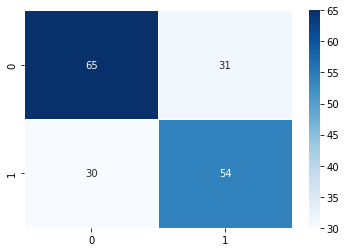

In [34]:
print(f'_______________________________________RandomOverSampler__________________________________________________')
check_performance(LogisticRegression(max_iter=2000), param_grid_lg, X_train_os, X_test_os, y_train_os, y_test_os, results, 7)

_______________________________________EditedNearestNeighbours____________________________________________
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        59
           1       0.50      0.30      0.37        10

    accuracy                           0.86        69
   macro avg       0.69      0.62      0.65        69
weighted avg       0.83      0.86      0.84        69

Train Accuracy: 0.895
Test Accuracy: 0.855


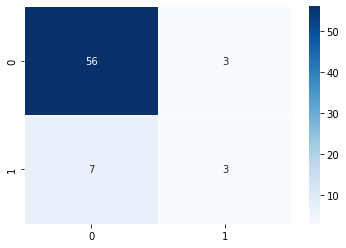

In [35]:
print(f'_______________________________________EditedNearestNeighbours____________________________________________')
check_performance(LogisticRegression(max_iter=2000), param_grid_lg, X_train_enn, X_test_enn, y_train_enn, y_test_enn, results, 8)

_______________________________________SMOTE______________________________________________________________
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        96
           1       0.68      0.75      0.71        84

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.72      0.72      0.72       180

Train Accuracy: 0.742
Test Accuracy: 0.717


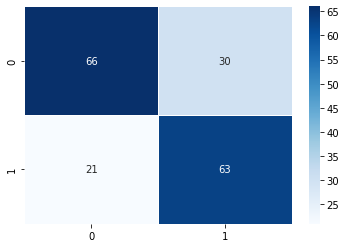

In [36]:
print(f'_______________________________________SMOTE______________________________________________________________')
check_performance(LogisticRegression(max_iter=2000), param_grid_lg, X_train_sm, X_test_sm, y_train_sm, y_test_sm, results, 9)

#### Naive Bayes Balanced

_______________________________________RandomUnderSampler_________________________________________________
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        12
           1       1.00      0.12      0.22         8

    accuracy                           0.65        20
   macro avg       0.82      0.56      0.50        20
weighted avg       0.78      0.65      0.55        20

Train Accuracy: 0.628
Test Accuracy: 0.65


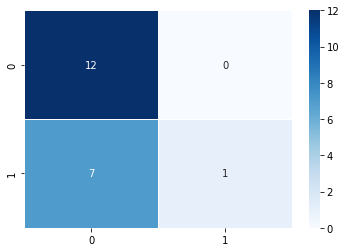

In [38]:
print(f'_______________________________________RandomUnderSampler_________________________________________________')
check_performance(GaussianNB(), param_grid_nb, X_train_us, X_test_us, y_train_us, y_test_us,results, 10)

_______________________________________RandomOverSampler__________________________________________________
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        96
           1       0.77      0.32      0.45        84

    accuracy                           0.64       180
   macro avg       0.69      0.62      0.59       180
weighted avg       0.68      0.64      0.60       180

Train Accuracy: 0.638
Test Accuracy: 0.639


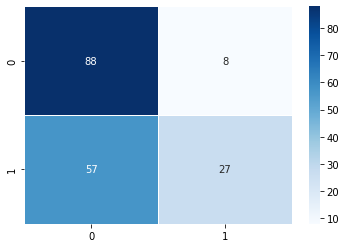

In [39]:
print(f'_______________________________________RandomOverSampler__________________________________________________')
check_performance(GaussianNB(), param_grid_nb, X_train_os, X_test_os, y_train_os, y_test_os, results, 11)

_______________________________________EditedNearestNeighbours____________________________________________
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        59
           1       0.33      0.10      0.15        10

    accuracy                           0.84        69
   macro avg       0.60      0.53      0.53        69
weighted avg       0.79      0.84      0.80        69

Train Accuracy: 0.88
Test Accuracy: 0.841


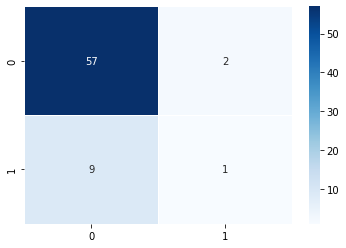

In [40]:
print(f'_______________________________________EditedNearestNeighbours____________________________________________')
check_performance(GaussianNB(), param_grid_nb, X_train_enn, X_test_enn, y_train_enn, y_test_enn, results, 12)

_______________________________________SMOTE______________________________________________________________
              precision    recall  f1-score   support

           0       0.62      0.92      0.74        96
           1       0.79      0.37      0.50        84

    accuracy                           0.66       180
   macro avg       0.71      0.64      0.62       180
weighted avg       0.70      0.66      0.63       180

Train Accuracy: 0.623
Test Accuracy: 0.661


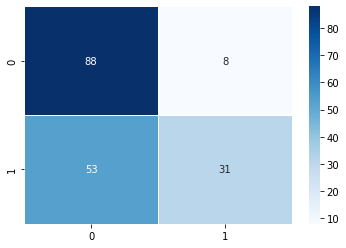

In [41]:
print(f'_______________________________________SMOTE______________________________________________________________')
check_performance(GaussianNB(), param_grid_nb, X_train_sm, X_test_sm, y_train_sm, y_test_sm, results, 13)

#### KNN Balanced

_______________________________________RandomUnderSampler_________________________________________________
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.67      0.75      0.71         8

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20

Train Accuracy: 0.654
Test Accuracy: 0.75


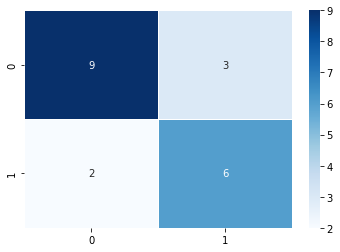

In [43]:
print(f'_______________________________________RandomUnderSampler_________________________________________________')
check_performance(KNeighborsClassifier(), param_grid_knn, X_train_us, X_test_us, y_train_us, y_test_us, results, 14)

_______________________________________RandomOverSampler__________________________________________________
              precision    recall  f1-score   support

           0       0.96      0.67      0.79        96
           1       0.72      0.96      0.82        84

    accuracy                           0.81       180
   macro avg       0.84      0.82      0.80       180
weighted avg       0.84      0.81      0.80       180

Train Accuracy: 0.901
Test Accuracy: 0.806


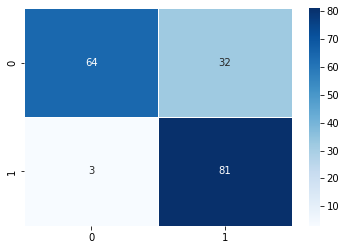

In [44]:
print(f'_______________________________________RandomOverSampler__________________________________________________')
check_performance(KNeighborsClassifier(), param_grid_knn,X_train_os, X_test_os, y_train_os, y_test_os, results, 15)

_______________________________________EditedNearestNeighbours____________________________________________
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        59
           1       0.50      0.10      0.17        10

    accuracy                           0.86        69
   macro avg       0.68      0.54      0.54        69
weighted avg       0.81      0.86      0.81        69

Train Accuracy: 0.862
Test Accuracy: 0.855


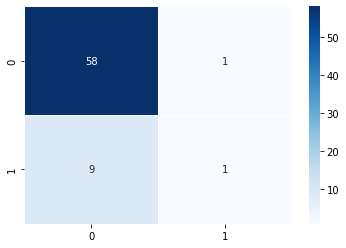

In [45]:
print(f'_______________________________________EditedNearestNeighbours____________________________________________')
check_performance(KNeighborsClassifier(), param_grid_knn,X_train_enn, X_test_enn, y_train_enn, y_test_enn, results, 16)

_______________________________________SMOTE______________________________________________________________
              precision    recall  f1-score   support

           0       0.75      0.58      0.65        96
           1       0.62      0.77      0.69        84

    accuracy                           0.67       180
   macro avg       0.68      0.68      0.67       180
weighted avg       0.69      0.67      0.67       180

Train Accuracy: 0.748
Test Accuracy: 0.672


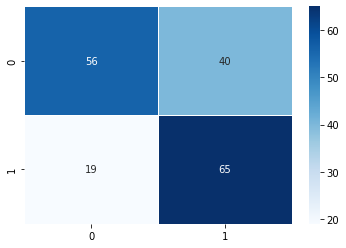

In [46]:
print(f'_______________________________________SMOTE______________________________________________________________')
check_performance(KNeighborsClassifier(), param_grid_knn,X_train_sm, X_test_sm, y_train_sm, y_test_sm, results, 17)

#### Decision Tree Balanced

_______________________________________RandomUnderSampler_________________________________________________
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.40      0.50      0.44         8

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.52      0.50      0.51        20

Train Accuracy: 0.756
Test Accuracy: 0.5


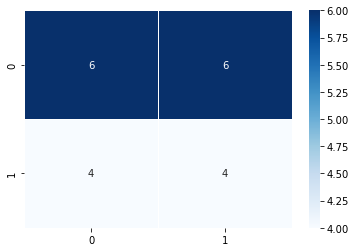

In [47]:
print(f'_______________________________________RandomUnderSampler_________________________________________________')
check_performance(DecisionTreeClassifier(random_state = 42), param_grid_dt, X_train_us, X_test_us, y_train_us, y_test_us, results, 18)

_______________________________________RandomOverSampler__________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        96
           1       0.82      1.00      0.90        84

    accuracy                           0.89       180
   macro avg       0.91      0.90      0.89       180
weighted avg       0.91      0.89      0.89       180

Train Accuracy: 0.985
Test Accuracy: 0.894


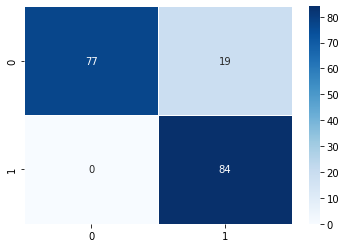

In [48]:
print(f'_______________________________________RandomOverSampler__________________________________________________')
check_performance(DecisionTreeClassifier(random_state = 42), param_grid_dt,X_train_os, X_test_os, y_train_os, y_test_os, results, 19)

_______________________________________EditedNearestNeighbours____________________________________________
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        59
           1       0.50      0.10      0.17        10

    accuracy                           0.86        69
   macro avg       0.68      0.54      0.54        69
weighted avg       0.81      0.86      0.81        69

Train Accuracy: 0.895
Test Accuracy: 0.855


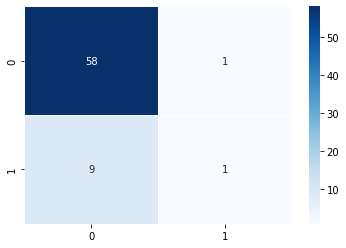

In [49]:
print(f'_______________________________________EditedNearestNeighbours____________________________________________')
check_performance(DecisionTreeClassifier(random_state = 42), param_grid_dt,X_train_enn, X_test_enn, y_train_enn, y_test_enn, results, 20)

_______________________________________SMOTE______________________________________________________________
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        96
           1       0.81      0.88      0.85        84

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180

Train Accuracy: 0.922
Test Accuracy: 0.85


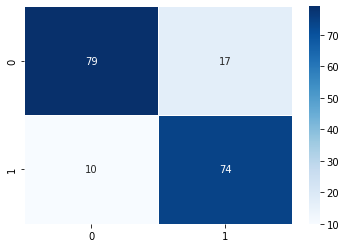

In [50]:
print(f'_______________________________________SMOTE______________________________________________________________')
check_performance(DecisionTreeClassifier(random_state = 42), param_grid_dt,X_train_sm, X_test_sm, y_train_sm, y_test_sm, results, 21)

#### Random Forest Balanced

_______________________________________RandomUnderSampler_________________________________________________
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.50      0.38      0.43         8

    accuracy                           0.60        20
   macro avg       0.57      0.56      0.56        20
weighted avg       0.59      0.60      0.59        20

Train Accuracy: 1.0
Test Accuracy: 0.6


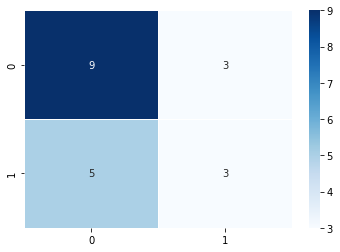

In [51]:
print(f'_______________________________________RandomUnderSampler_________________________________________________')
check_performance(RandomForestClassifier(random_state = 42), param_grid_rf, X_train_us, X_test_us, y_train_us, y_test_us, results, 22)

_______________________________________RandomOverSampler__________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        96
           1       0.98      1.00      0.99        84

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180

Train Accuracy: 0.999
Test Accuracy: 0.989


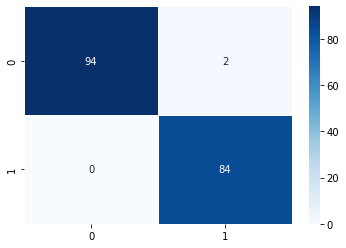

In [52]:
print(f'_______________________________________RandomOverSampler__________________________________________________')
check_performance(RandomForestClassifier(random_state = 42), param_grid_rf, X_train_os, X_test_os, y_train_os, y_test_os, results, 23)

_______________________________________EditedNearestNeighbours____________________________________________
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        59
           1       0.50      0.20      0.29        10

    accuracy                           0.86        69
   macro avg       0.69      0.58      0.60        69
weighted avg       0.82      0.86      0.83        69

Train Accuracy: 1.0
Test Accuracy: 0.855


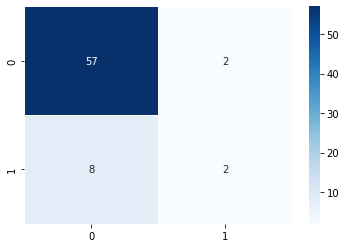

In [53]:
print(f'_______________________________________EditedNearestNeighbours____________________________________________')
check_performance(RandomForestClassifier(random_state = 42), param_grid_rf, X_train_enn, X_test_enn, y_train_enn, y_test_enn, results, 24)

_______________________________________SMOTE______________________________________________________________
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        96
           1       0.88      0.94      0.91        84

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180

Train Accuracy: 0.999
Test Accuracy: 0.911


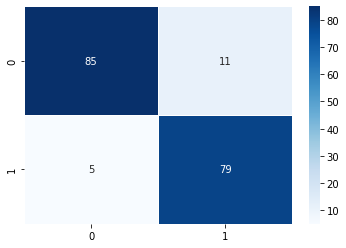

In [54]:
print(f'_______________________________________SMOTE______________________________________________________________')
check_performance(RandomForestClassifier(random_state = 42), param_grid_rf, X_train_sm, X_test_sm, y_train_sm, y_test_sm, results, 25)

#### Gradient Boosting Balanced

_______________________________________RandomUnderSampler_________________________________________________
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.33      0.25      0.29         8

    accuracy                           0.50        20
   macro avg       0.45      0.46      0.45        20
weighted avg       0.48      0.50      0.48        20

Train Accuracy: 1.0
Test Accuracy: 0.5


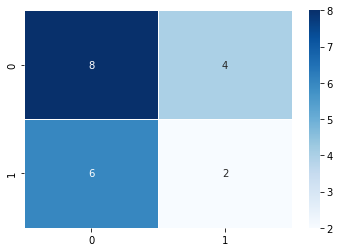

In [55]:
print(f'_______________________________________RandomUnderSampler_________________________________________________')
check_performance(GradientBoostingClassifier(random_state = 42), param_grid_gb,X_train_us, X_test_us, y_train_us, y_test_us, results, 26)

_______________________________________RandomOverSampler__________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        96
           1       0.92      1.00      0.96        84

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180

Train Accuracy: 0.999
Test Accuracy: 0.961


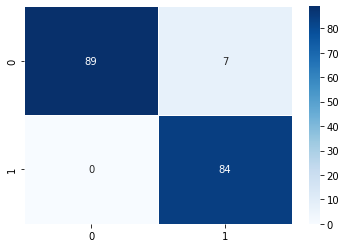

In [56]:
print(f'_______________________________________RandomOverSampler__________________________________________________')
check_performance(GradientBoostingClassifier(random_state = 42), param_grid_gb, X_train_os, X_test_os, y_train_os, y_test_os, results, 27)

_______________________________________EditedNearestNeighbours____________________________________________
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        59
           1       0.40      0.20      0.27        10

    accuracy                           0.84        69
   macro avg       0.64      0.57      0.59        69
weighted avg       0.81      0.84      0.82        69

Train Accuracy: 0.913
Test Accuracy: 0.841


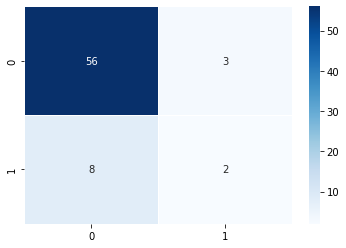

In [57]:
print(f'_______________________________________EditedNearestNeighbours____________________________________________')
check_performance(GradientBoostingClassifier(random_state = 42), param_grid_gb, X_train_enn, X_test_enn, y_train_enn, y_test_enn, results, 28)

_______________________________________SMOTE______________________________________________________________
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        96
           1       0.86      0.92      0.89        84

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180

Train Accuracy: 0.999
Test Accuracy: 0.889


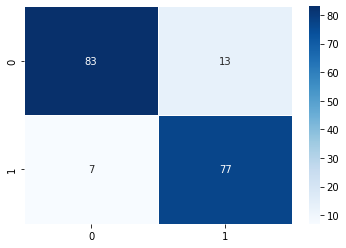

In [58]:
print(f'_______________________________________SMOTE______________________________________________________________')
check_performance(GradientBoostingClassifier(random_state = 42), param_grid_gb, X_train_sm, X_test_sm, y_train_sm, y_test_sm, results, 29)

# Method 2 - Applying PCA to dataset

Variances (Percentage):
[59.60035314 12.39163823  6.3738735   5.88121378  4.96156257  3.05672903
  2.76572656  2.23130751  1.5940515   0.78686226  0.35668191]



Text(0, 0.5, 'Explained variance (%)')

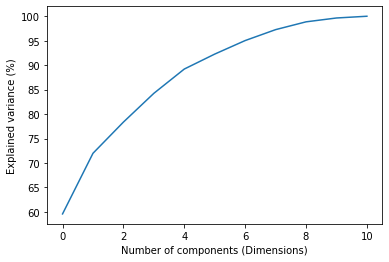

In [64]:
# Do feature scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [65]:
pca = PCA(n_components = 6)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)

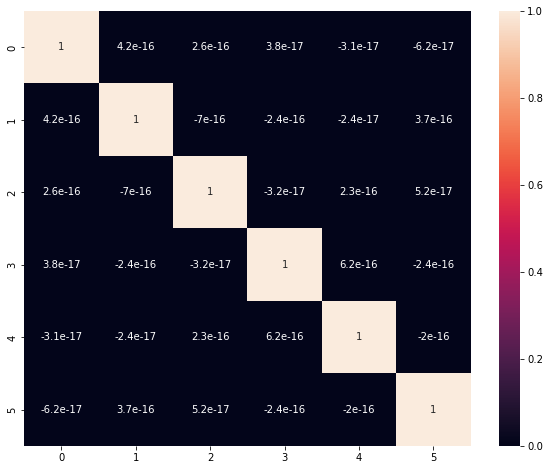

In [66]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)
plt.savefig("Heatmap2.png")

In [67]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state=42)

#### Logistic Regression - Unbalanced PCA

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        88
           1       0.00      0.00      0.00        12

    accuracy                           0.87       100
   macro avg       0.44      0.49      0.47       100
weighted avg       0.77      0.87      0.82       100

Train Accuracy: 0.917
Test Accuracy: 0.87


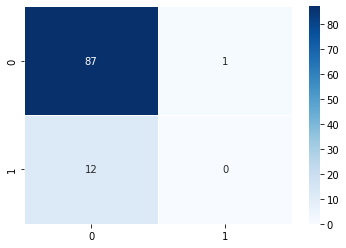

In [68]:
check_performance(LogisticRegression(max_iter=1000), param_grid_lg, X_train_pca, X_test_pca, y_train, y_test, results, 30)

#### Naive Bayes Unbalanced PCA

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        88
           1       0.00      0.00      0.00        12

    accuracy                           0.86       100
   macro avg       0.44      0.49      0.46       100
weighted avg       0.77      0.86      0.81       100

Train Accuracy: 0.907
Test Accuracy: 0.86


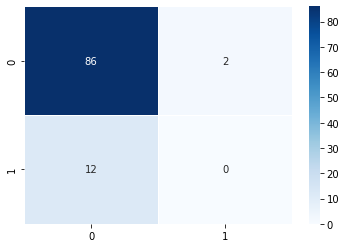

In [69]:
check_performance(GaussianNB(), param_grid_nb, X_train_pca, X_test_pca, y_train, y_test, results, 31)

#### KNN Unbalanced PCA

C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.p

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        88
           1       0.00      0.00      0.00        12

    accuracy                           0.88       100
   macro avg       0.44      0.50      0.47       100
weighted avg       0.77      0.88      0.82       100

Train Accuracy: 0.907
Test Accuracy: 0.88


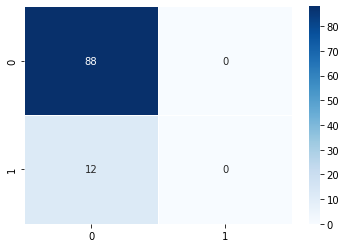

In [70]:
check_performance(KNeighborsClassifier(), param_grid_knn, X_train_pca, X_test_pca, y_train, y_test, results, 32)

#### Decision tree Unbalanced PCA

C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.p

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        88
           1       0.00      0.00      0.00        12

    accuracy                           0.88       100
   macro avg       0.44      0.50      0.47       100
weighted avg       0.77      0.88      0.82       100

Train Accuracy: 0.907
Test Accuracy: 0.88


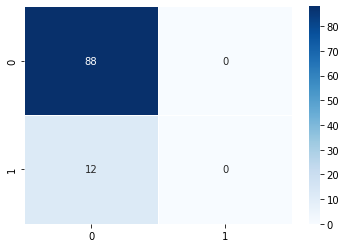

In [71]:
check_performance(DecisionTreeClassifier(random_state = 42), param_grid_dt, X_train_pca, X_test_pca, y_train, y_test, results, 33)

#### Random Forest Unbalanced PCA

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        88
           1       0.00      0.00      0.00        12

    accuracy                           0.87       100
   macro avg       0.44      0.49      0.47       100
weighted avg       0.77      0.87      0.82       100

Train Accuracy: 0.997
Test Accuracy: 0.87


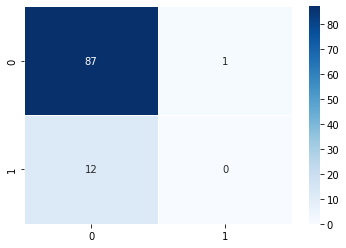

In [72]:
check_performance(RandomForestClassifier(random_state = 42), param_grid_rf, X_train_pca, X_test_pca, y_train, y_test, results, 34)

#### Gradient Boosting Unbalanced PCA

C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.p

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        88
           1       0.00      0.00      0.00        12

    accuracy                           0.88       100
   macro avg       0.44      0.50      0.47       100
weighted avg       0.77      0.88      0.82       100

Train Accuracy: 0.907
Test Accuracy: 0.88


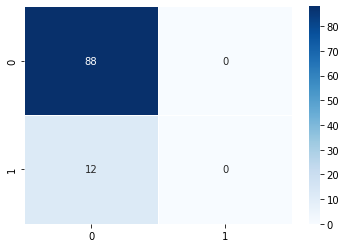

In [74]:
check_performance(GradientBoostingClassifier(random_state = 0), param_grid_gb, X_train_pca, X_test_pca, y_train, y_test, results, 35)

# Balacing PCA dataset

In [75]:
X_subsample_pca, y_subsample = rus.fit_resample(X_pca, y)
X_oversample_pca, y_oversample = ros.fit_resample(X_pca, y)
X_enn_pca, y_enn = enn.fit_resample(X_pca, y)
X_smote_pca, Y_smote = smote.fit_resample(X_pca, y)

In [76]:
X_pca_train_us, X_pca_test_us, y_train_us, y_test_us = train_test_split(X_subsample_pca, y_subsample, test_size=0.20, random_state=42)
X_pca_train_os, X_pca_test_os, y_train_os, y_test_os = train_test_split(X_oversample_pca, y_oversample, test_size=0.20, random_state=42)
X_pca_train_enn, X_pca_test_enn, y_train_enn, y_test_enn = train_test_split(X_enn_pca, y_enn, test_size=0.20, random_state=42)
X_pca_train_sm, X_pca_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote_pca, Y_smote, test_size=0.20, random_state=42)

#### Logistic Regression Balanced PCA

_______________________________________RandomUnderSampler_________________________________________________
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.62      0.62      0.62         8

    accuracy                           0.70        20
   macro avg       0.69      0.69      0.69        20
weighted avg       0.70      0.70      0.70        20

Train Accuracy: 0.821
Test Accuracy: 0.7


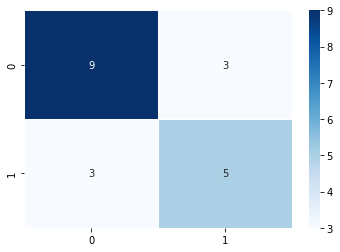

In [77]:
print(f'_______________________________________RandomUnderSampler_________________________________________________')
check_performance(LogisticRegression(max_iter=2000), param_grid_lg, X_pca_train_us, X_pca_test_us, y_train_us, y_test_us, results, 36)

_______________________________________RandomOverSampler__________________________________________________
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        96
           1       0.72      0.75      0.73        84

    accuracy                           0.74       180
   macro avg       0.74      0.74      0.74       180
weighted avg       0.75      0.74      0.74       180

Train Accuracy: 0.759
Test Accuracy: 0.744


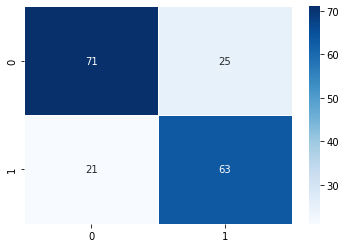

In [79]:
print(f'_______________________________________RandomOverSampler__________________________________________________')
check_performance(LogisticRegression(max_iter=2000), param_grid_lg, X_pca_train_os, X_pca_test_os, y_train_os, y_test_os, results, 37)

_______________________________________EditedNearestNeighbours____________________________________________
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        66
           1       1.00      0.25      0.40         8

    accuracy                           0.92        74
   macro avg       0.96      0.62      0.68        74
weighted avg       0.93      0.92      0.90        74

Train Accuracy: 0.936
Test Accuracy: 0.919


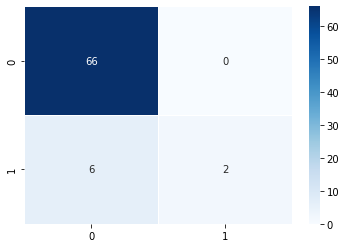

In [80]:
print(f'_______________________________________EditedNearestNeighbours____________________________________________')
check_performance(LogisticRegression(max_iter=2000), param_grid_lg, X_pca_train_enn, X_pca_test_enn, y_train_enn, y_test_enn, results, 38)

_______________________________________SMOTE______________________________________________________________
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        96
           1       0.74      0.87      0.80        84

    accuracy                           0.79       180
   macro avg       0.80      0.80      0.79       180
weighted avg       0.81      0.79      0.79       180

Train Accuracy: 0.76
Test Accuracy: 0.794


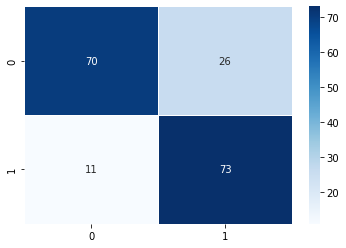

In [81]:
print(f'_______________________________________SMOTE______________________________________________________________')
check_performance(LogisticRegression(max_iter=2000), param_grid_lg, X_pca_train_sm, X_pca_test_sm, y_train_sm, y_test_sm, results, 39)

#### Naive Bayes Balanced PCA 

_______________________________________RandomUnderSampler_________________________________________________
              precision    recall  f1-score   support

           0       0.58      0.92      0.71        12
           1       0.00      0.00      0.00         8

    accuracy                           0.55        20
   macro avg       0.29      0.46      0.35        20
weighted avg       0.35      0.55      0.43        20

Train Accuracy: 0.615
Test Accuracy: 0.55


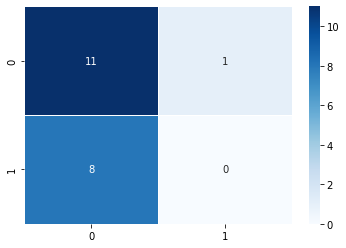

In [82]:
print(f'_______________________________________RandomUnderSampler_________________________________________________')
check_performance(GaussianNB(), param_grid_nb, X_pca_train_us, X_pca_test_us, y_train_us, y_test_us, results, 40)

_______________________________________RandomOverSampler__________________________________________________
              precision    recall  f1-score   support

           0       0.63      0.95      0.76        96
           1       0.86      0.37      0.52        84

    accuracy                           0.68       180
   macro avg       0.75      0.66      0.64       180
weighted avg       0.74      0.68      0.65       180

Train Accuracy: 0.597
Test Accuracy: 0.678


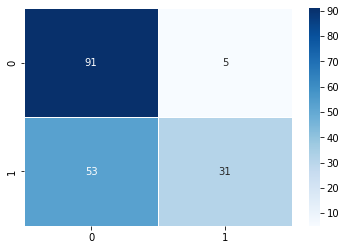

In [83]:
print(f'_______________________________________RandomOverSampler__________________________________________________')
check_performance(GaussianNB(), param_grid_nb, X_pca_train_os, X_pca_test_os, y_train_os, y_test_os, results, 41)

_______________________________________EditedNearestNeighbours____________________________________________
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        66
           1       0.50      0.12      0.20         8

    accuracy                           0.89        74
   macro avg       0.70      0.55      0.57        74
weighted avg       0.86      0.89      0.86        74

Train Accuracy: 0.882
Test Accuracy: 0.892


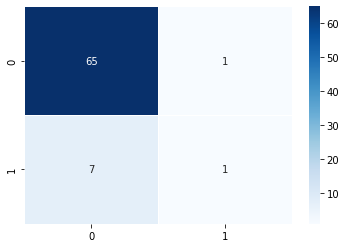

In [85]:
print(f'_______________________________________EditedNearestNeighbours____________________________________________')
check_performance(GaussianNB(), param_grid_nb, X_pca_train_enn, X_pca_test_enn, y_train_enn, y_test_enn, results, 42)

_______________________________________SMOTE______________________________________________________________
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        96
           1       0.73      0.75      0.74        84

    accuracy                           0.76       180
   macro avg       0.75      0.76      0.75       180
weighted avg       0.76      0.76      0.76       180

Train Accuracy: 0.713
Test Accuracy: 0.756


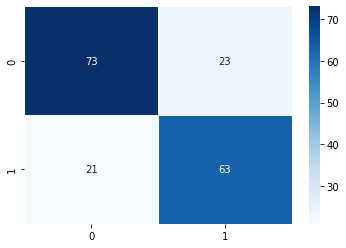

In [86]:
print(f'_______________________________________SMOTE______________________________________________________________')
check_performance(GaussianNB(), param_grid_nb, X_pca_train_sm, X_pca_test_sm, y_train_sm, y_test_sm, results, 43)

# K-Nearest Neighbour - PCA

_______________________________________RandomUnderSampler_________________________________________________
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.42      0.62      0.50         8

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.50        20
weighted avg       0.54      0.50      0.50        20

Train Accuracy: 0.679
Test Accuracy: 0.5


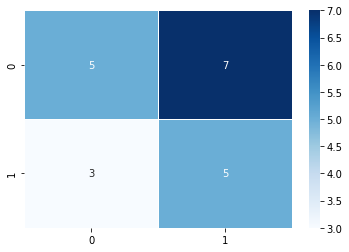

In [87]:
print(f'_______________________________________RandomUnderSampler_________________________________________________')
check_performance(KNeighborsClassifier(), param_grid_knn, X_pca_train_us, X_pca_test_us, y_train_us, y_test_us, results, 44)

_______________________________________RandomOverSampler__________________________________________________
              precision    recall  f1-score   support

           0       0.99      0.73      0.84        96
           1       0.76      0.99      0.86        84

    accuracy                           0.85       180
   macro avg       0.87      0.86      0.85       180
weighted avg       0.88      0.85      0.85       180

Train Accuracy: 0.912
Test Accuracy: 0.85


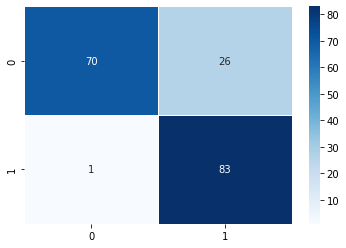

In [88]:
print(f'_______________________________________RandomOverSampler__________________________________________________')
check_performance(KNeighborsClassifier(), param_grid_knn, X_pca_train_os, X_pca_test_os, y_train_os, y_test_os, results, 45)

_______________________________________EditedNearestNeighbours____________________________________________
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.38      0.55         8

    accuracy                           0.93        74
   macro avg       0.96      0.69      0.75        74
weighted avg       0.94      0.93      0.92        74

Train Accuracy: 0.953
Test Accuracy: 0.932


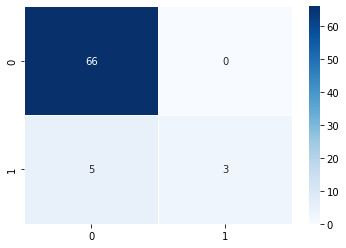

In [89]:
print(f'_______________________________________EditedNearestNeighbours____________________________________________')
check_performance(KNeighborsClassifier(), param_grid_knn, X_pca_train_enn, X_pca_test_enn, y_train_enn, y_test_enn, results, 46)

_______________________________________SMOTE______________________________________________________________
              precision    recall  f1-score   support

           0       0.99      0.73      0.84        96
           1       0.76      0.99      0.86        84

    accuracy                           0.85       180
   macro avg       0.87      0.86      0.85       180
weighted avg       0.88      0.85      0.85       180

Train Accuracy: 0.903
Test Accuracy: 0.85


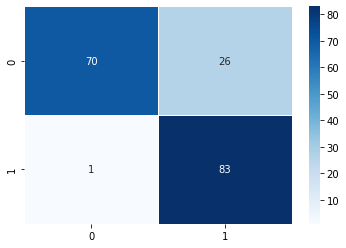

In [90]:
print(f'_______________________________________SMOTE______________________________________________________________')
check_performance(KNeighborsClassifier(), param_grid_knn, X_pca_train_sm, X_pca_test_sm, y_train_sm, y_test_sm, results, 47)

#### Decision Tree Balanced PCA

_______________________________________RandomUnderSampler_________________________________________________
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.50      0.75      0.60         8

    accuracy                           0.60        20
   macro avg       0.62      0.62      0.60        20
weighted avg       0.65      0.60      0.60        20

Train Accuracy: 0.846
Test Accuracy: 0.6


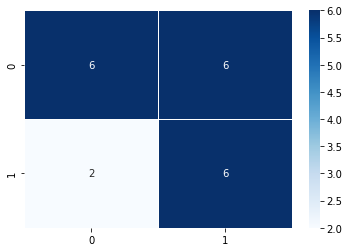

In [91]:
print(f'_______________________________________RandomUnderSampler_________________________________________________')
check_performance(DecisionTreeClassifier(random_state = 42), param_grid_dt, X_pca_train_us, X_pca_test_us, y_train_us, y_test_us, results, 48)

_______________________________________RandomOverSampler__________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        96
           1       0.86      1.00      0.92        84

    accuracy                           0.92       180
   macro avg       0.93      0.93      0.92       180
weighted avg       0.93      0.92      0.92       180

Train Accuracy: 0.983
Test Accuracy: 0.922


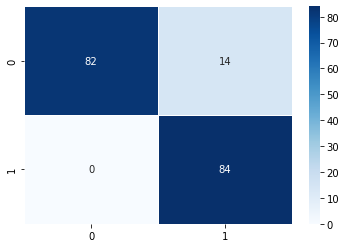

In [92]:
print(f'_______________________________________RandomOverSampler__________________________________________________')
check_performance(DecisionTreeClassifier(random_state = 42), param_grid_dt, X_pca_train_os, X_pca_test_os, y_train_os, y_test_os,  results, 49)

_______________________________________EditedNearestNeighbours____________________________________________
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        66
           1       0.57      0.50      0.53         8

    accuracy                           0.91        74
   macro avg       0.76      0.73      0.74        74
weighted avg       0.90      0.91      0.90        74

Train Accuracy: 0.963
Test Accuracy: 0.905


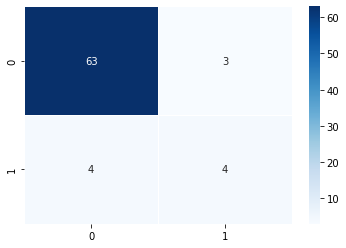

In [93]:
print(f'_______________________________________EditedNearestNeighbours____________________________________________')
check_performance(DecisionTreeClassifier(random_state = 42), param_grid_dt, X_pca_train_enn, X_pca_test_enn, y_train_enn, y_test_enn, results, 50)

_______________________________________SMOTE______________________________________________________________
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        96
           1       0.76      0.83      0.80        84

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180

Train Accuracy: 0.929
Test Accuracy: 0.8


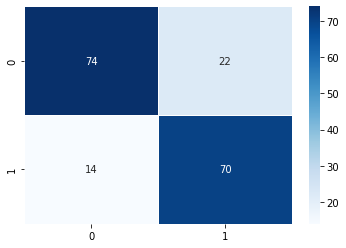

In [94]:
print(f'_______________________________________SMOTE______________________________________________________________')
check_performance(DecisionTreeClassifier(random_state = 42), param_grid_dt, X_pca_train_sm, X_pca_test_sm, y_train_sm, y_test_sm, results, 51)

#### Random Forest Balanced PCA

_______________________________________RandomUnderSampler_________________________________________________
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.54      0.88      0.67         8

    accuracy                           0.65        20
   macro avg       0.70      0.69      0.65        20
weighted avg       0.73      0.65      0.65        20

Train Accuracy: 0.962
Test Accuracy: 0.65


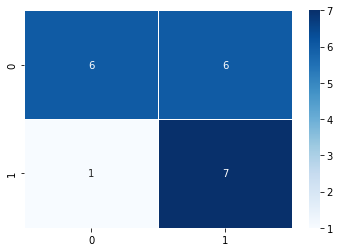

In [95]:
print(f'_______________________________________RandomUnderSampler_________________________________________________')
check_performance(RandomForestClassifier(random_state = 42), param_grid_dt, X_pca_train_us, X_pca_test_us, y_train_us, y_test_us, results, 52)

_______________________________________RandomOverSampler__________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        96
           1       0.91      1.00      0.95        84

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180

Train Accuracy: 0.996
Test Accuracy: 0.956


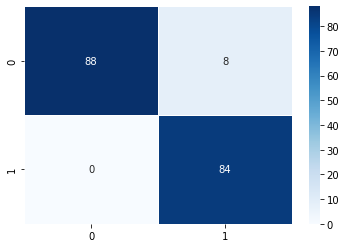

In [96]:
print(f'_______________________________________RandomOverSampler__________________________________________________')
check_performance(RandomForestClassifier(random_state = 42), param_grid_dt, X_pca_train_os, X_pca_test_os, y_train_os,y_test_os,  results, 53)

_______________________________________EditedNearestNeighbours____________________________________________
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        66
           1       0.75      0.38      0.50         8

    accuracy                           0.92        74
   macro avg       0.84      0.68      0.73        74
weighted avg       0.91      0.92      0.91        74

Train Accuracy: 0.966
Test Accuracy: 0.919


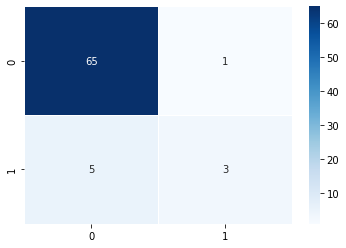

In [97]:
print(f'_______________________________________EditedNearestNeighbours____________________________________________')
check_performance(RandomForestClassifier(random_state = 42), param_grid_dt, X_pca_train_enn, X_pca_test_enn, y_train_enn, y_test_enn, results, 54)

_______________________________________SMOTE______________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.84      0.92        96
           1       0.85      1.00      0.92        84

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.93      0.92      0.92       180

Train Accuracy: 0.993
Test Accuracy: 0.917


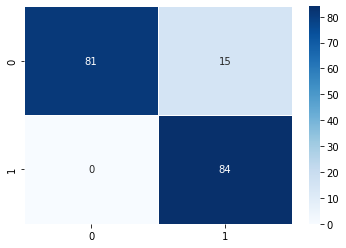

In [98]:
print(f'_______________________________________SMOTE______________________________________________________________')
check_performance(RandomForestClassifier(random_state = 42), param_grid_dt, X_pca_train_sm, X_pca_test_sm, y_train_sm, y_test_sm, results, 55)

# Gradient Boosting - PCA

_______________________________________RandomUnderSampler_________________________________________________
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.50      0.75      0.60         8

    accuracy                           0.60        20
   macro avg       0.62      0.62      0.60        20
weighted avg       0.65      0.60      0.60        20

Train Accuracy: 1.0
Test Accuracy: 0.6


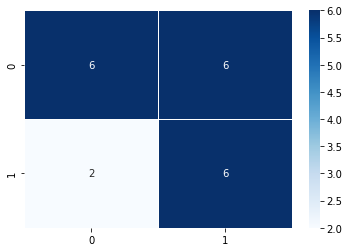

In [99]:
print(f'_______________________________________RandomUnderSampler_________________________________________________')
check_performance(GradientBoostingClassifier(random_state = 42), param_grid_gb, X_pca_train_us, X_pca_test_us, y_train_us, y_test_us, results, 56)

_______________________________________RandomOverSampler__________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        96
           1       0.91      1.00      0.95        84

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180

Train Accuracy: 0.999
Test Accuracy: 0.956


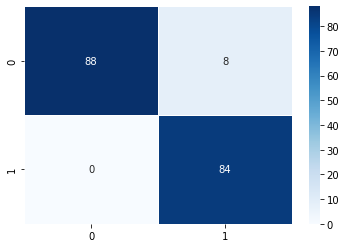

In [100]:
print(f'_______________________________________RandomOverSampler__________________________________________________')
check_performance(GradientBoostingClassifier(random_state = 42), param_grid_gb, X_pca_train_os, X_pca_test_os, y_train_os,y_test_os, results, 57)

_______________________________________EditedNearestNeighbours____________________________________________
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        66
           1       0.75      0.38      0.50         8

    accuracy                           0.92        74
   macro avg       0.84      0.68      0.73        74
weighted avg       0.91      0.92      0.91        74

Train Accuracy: 0.997
Test Accuracy: 0.919


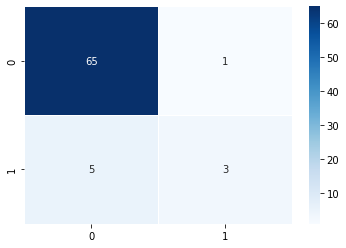

In [101]:
print(f'_______________________________________EditedNearestNeighbours____________________________________________')
check_performance(GradientBoostingClassifier(random_state = 42), param_grid_gb, X_pca_train_enn, X_pca_test_enn, y_train_enn, y_test_enn, results, 58)

_______________________________________SMOTE______________________________________________________________
              precision    recall  f1-score   support

           0       0.99      0.82      0.90        96
           1       0.83      0.99      0.90        84

    accuracy                           0.90       180
   macro avg       0.91      0.91      0.90       180
weighted avg       0.91      0.90      0.90       180

Train Accuracy: 0.999
Test Accuracy: 0.9


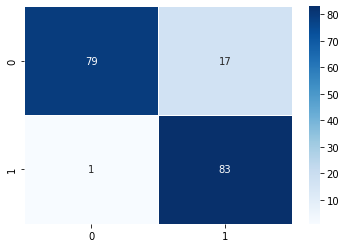

In [102]:
print(f'_______________________________________SMOTE______________________________________________________________')
check_performance(GradientBoostingClassifier(random_state = 42), param_grid_gb, X_pca_train_sm, X_pca_test_sm, y_train_sm, y_test_sm, results, 59)

# Visualize Results

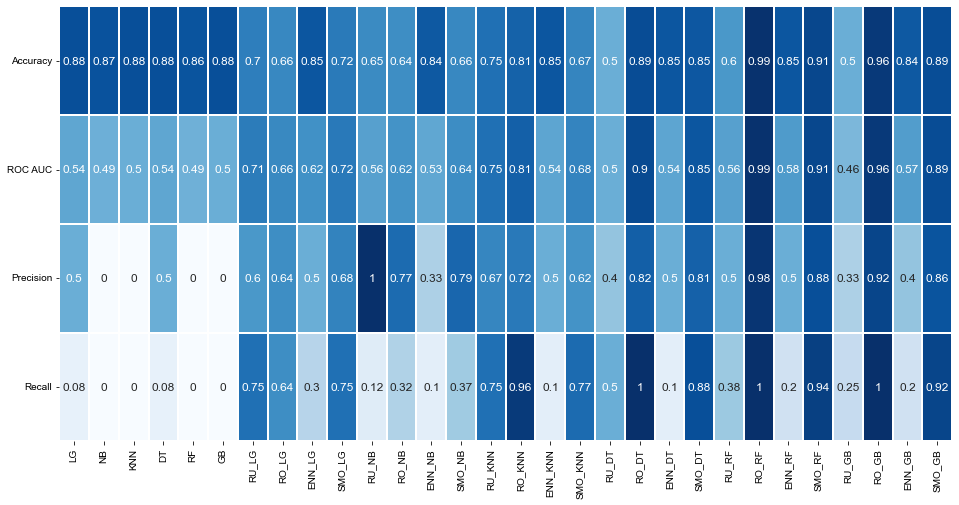

In [103]:
plt.figure(figsize = (16, 8))
sns.heatmap(results[results.columns.to_list()[0:30]].astype(float), cmap = 'Blues', annot = True, linewidths = 2, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['Accuracy', 'ROC AUC', 'Precision', 'Recall'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.show()

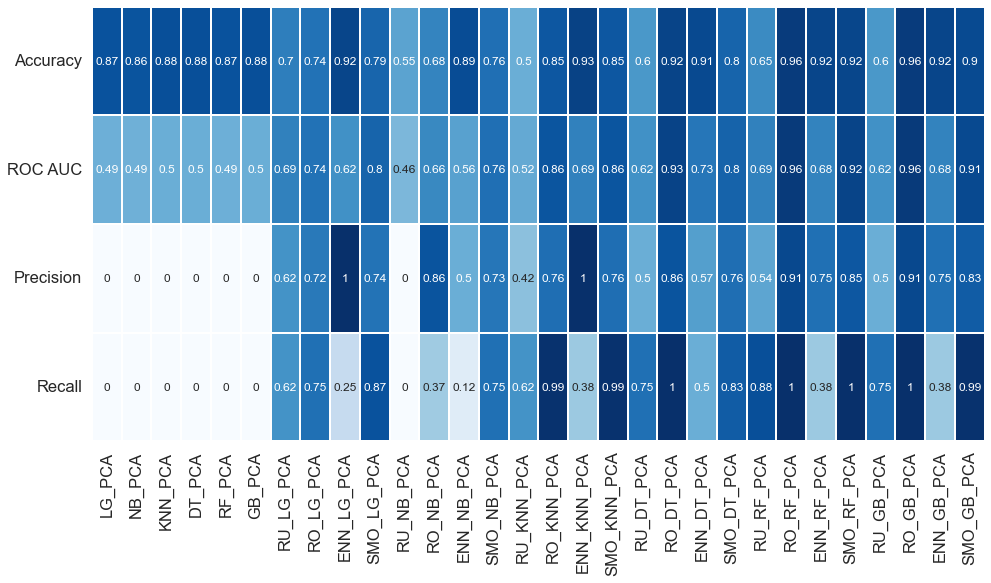

In [104]:
plt.figure(figsize = (16, 8))
sns.heatmap(results[results.columns.to_list()[30:60]].astype(float), cmap = 'Blues', annot = True, linewidths = 2, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['Accuracy', 'ROC AUC', 'Precision', 'Recall'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.show()

### ROC Curves

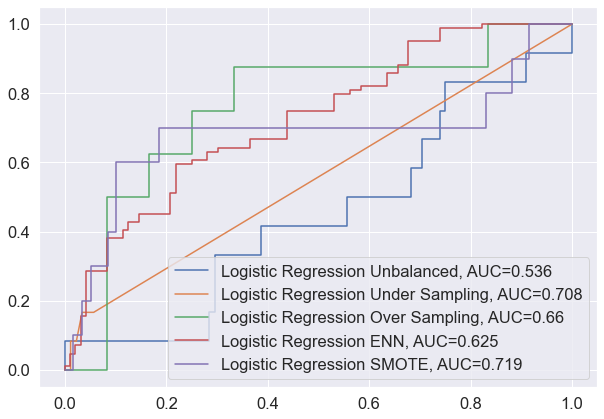

In [106]:
plt.figure(figsize=(10,7)).clf()
plt.plot(values[0][0],values[0][1],label="Logistic Regression Unbalanced, AUC="+str(results.loc['ROC_AUC']['LG']))
plt.plot(values[6][0],values[6][1],label="Logistic Regression Under Sampling, AUC="+str(results.loc['ROC_AUC']['RU_LG']))
plt.plot(values[7][0],values[7][1],label="Logistic Regression Over Sampling, AUC="+str(results.loc['ROC_AUC']['RO_LG']))
plt.plot(values[8][0],values[8][1],label="Logistic Regression ENN, AUC="+str(results.loc['ROC_AUC']['ENN_LG']))
plt.plot(values[9][0],values[9][1],label="Logistic Regression SMOTE, AUC="+str(results.loc['ROC_AUC']['SMO_LG']))
plt.legend()

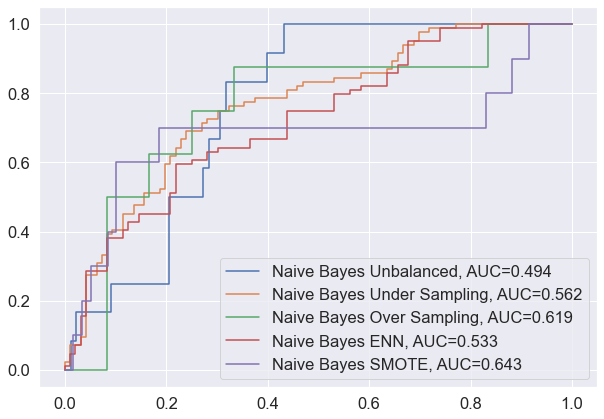

In [112]:
plt.figure(figsize=(10,7)).clf()
plt.plot(values[1][0],values[1][1],label="Naive Bayes Unbalanced, AUC="+str(results.loc['ROC_AUC']['NB']))
plt.plot(values[10][0],values[10][1],label="Naive Bayes Under Sampling, AUC="+str(results.loc['ROC_AUC']['RU_NB']))
plt.plot(values[11][0],values[11][1],label="Naive Bayes Over Sampling, AUC="+str(results.loc['ROC_AUC']['RO_NB']))
plt.plot(values[12][0],values[12][1],label="Naive Bayes ENN, AUC="+str(results.loc['ROC_AUC']['ENN_NB']))
plt.plot(values[13][0],values[13][1],label="Naive Bayes SMOTE, AUC="+str(results.loc['ROC_AUC']['SMO_NB']))
plt.legend()

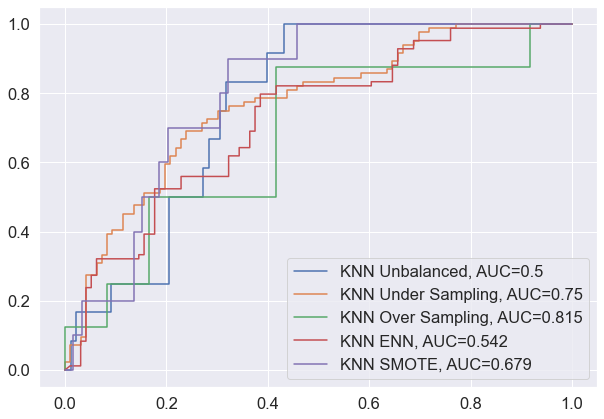

In [113]:
plt.figure(figsize=(10,7)).clf()
plt.plot(values[2][0],values[2][1],label="KNN Unbalanced, AUC="+str(results.loc['ROC_AUC']['KNN']))
plt.plot(values[14][0],values[14][1],label="KNN Under Sampling, AUC="+str(results.loc['ROC_AUC']['RU_KNN']))
plt.plot(values[15][0],values[15][1],label="KNN Over Sampling, AUC="+str(results.loc['ROC_AUC']['RO_KNN']))
plt.plot(values[16][0],values[16][1],label="KNN ENN, AUC="+str(results.loc['ROC_AUC']['ENN_KNN']))
plt.plot(values[17][0],values[17][1],label="KNN SMOTE, AUC="+str(results.loc['ROC_AUC']['SMO_KNN']))
plt.legend()

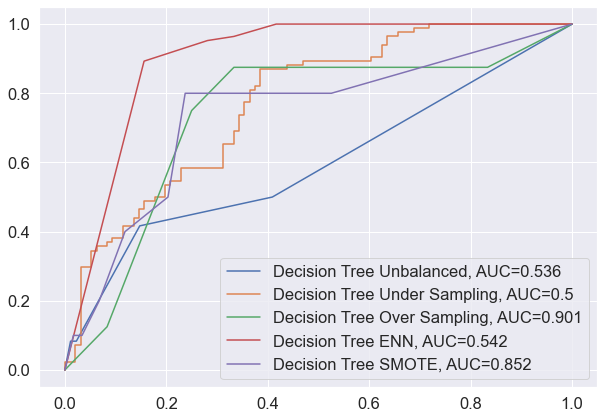

In [114]:
plt.figure(figsize=(10,7)).clf()
plt.plot(values[3][0],values[3][1],label="Decision Tree Unbalanced, AUC="+str(results.loc['ROC_AUC']['DT']))
plt.plot(values[18][0],values[18][1],label="Decision Tree Under Sampling, AUC="+str(results.loc['ROC_AUC']['RU_DT']))
plt.plot(values[19][0],values[19][1],label="Decision Tree Over Sampling, AUC="+str(results.loc['ROC_AUC']['RO_DT']))
plt.plot(values[20][0],values[20][1],label="Decision Tree ENN, AUC="+str(results.loc['ROC_AUC']['ENN_DT']))
plt.plot(values[21][0],values[21][1],label="Decision Tree SMOTE, AUC="+str(results.loc['ROC_AUC']['SMO_DT']))
plt.legend()

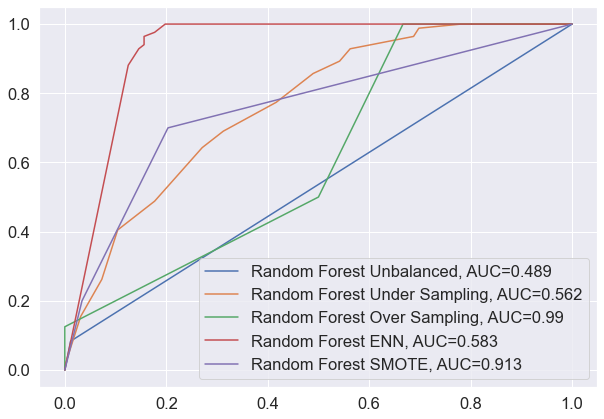

In [115]:
plt.figure(figsize=(10,7)).clf()
plt.plot(values[4][0],values[4][1],label="Random Forest Unbalanced, AUC="+str(results.loc['ROC_AUC']['RF']))
plt.plot(values[22][0],values[22][1],label="Random Forest Under Sampling, AUC="+str(results.loc['ROC_AUC']['RU_RF']))
plt.plot(values[23][0],values[23][1],label="Random Forest Over Sampling, AUC="+str(results.loc['ROC_AUC']['RO_RF']))
plt.plot(values[24][0],values[24][1],label="Random Forest ENN, AUC="+str(results.loc['ROC_AUC']['ENN_RF']))
plt.plot(values[25][0],values[25][1],label="Random Forest SMOTE, AUC="+str(results.loc['ROC_AUC']['SMO_RF']))
plt.legend()

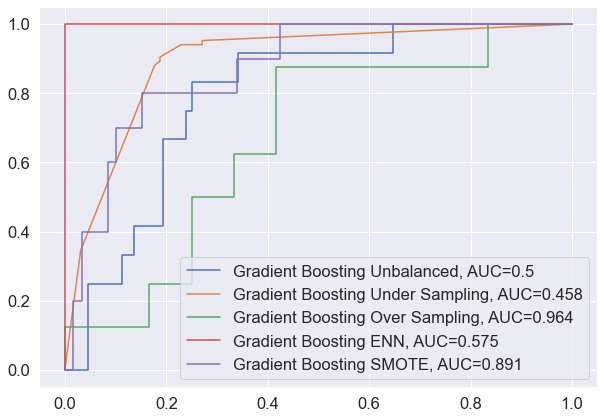

In [116]:
plt.figure(figsize=(10,7)).clf()
plt.plot(values[5][0],values[5][1],label="Gradient Boosting Unbalanced, AUC="+str(results.loc['ROC_AUC']['GB']))
plt.plot(values[26][0],values[26][1],label="Gradient Boosting Under Sampling, AUC="+str(results.loc['ROC_AUC']['RU_GB']))
plt.plot(values[27][0],values[27][1],label="Gradient Boosting Over Sampling, AUC="+str(results.loc['ROC_AUC']['RO_GB']))
plt.plot(values[28][0],values[28][1],label="Gradient Boosting ENN, AUC="+str(results.loc['ROC_AUC']['ENN_GB']))
plt.plot(values[29][0],values[29][1],label="Gradient Boosting SMOTE, AUC="+str(results.loc['ROC_AUC']['SMO_GB']))
plt.legend()

In [130]:
results[['LG','RU_LG', 'RO_LG', 'ENN_LG', 'SMO_LG']].T

,Accuracy,ROC_AUC,Precision,Recall
LG,0.88,0.536,0.5,0.08
RU_LG,0.7,0.708,0.6,0.75
RO_LG,0.661,0.66,0.64,0.64
ENN_LG,0.855,0.625,0.5,0.3
SMO_LG,0.717,0.719,0.68,0.75


In [126]:
param_grid_gb

{'n_estimators': [10, 50, 100, 500],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}